<a href="https://colab.research.google.com/github/vmpreciado/NETS3120/blob/main/TwitterDegree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Welcome to this Notebook where we delve into the intricate world of Twitter's social graph. Our journey begins with an analysis of a subgraph from Twitter's expansive network. This endeavor builds upon previous work where the DiGraph object was constructed and saved. We'll start by loading this pre-prepared DiGraph object to set the stage for our exploration.

In [ ]:
from google.colab import drive
drive.mount('/content/drive') # You will need to give Google Colab access to your Google Drive after running this line

# Replace the string below with the path of your file in Google Drive
file_path = '/content/drive/My Drive/ColabNotebooks/TwitterSmall.graphml'

Mounted at /content/drive


In [ ]:
import networkx as nx
X = nx.read_graphml(file_path)

With the DiGraph object 'X' now residing in our working memory, we embark on a quest to unravel its in-depth characteristics. Our first step is to meticulously compute the in- and out-degree sequences of the DiGraph. These sequences will reveal fundamental aspects of the network's structure and connectivity.

In [ ]:
in_degrees = X.in_degree()  # Returns a DegreeView object with node and in-degree
out_degrees = X.out_degree()  # Returns a DegreeView object with node and out-degree

# To get the degree sequences as lists:
in_degree_sequence = [d for n, d in in_degrees]
out_degree_sequence = [d for n, d in out_degrees]

Our analysis continues as we visualize the distribution of in- and out-degrees within the graph. To achieve this, we will construct histograms that display the frequency of these degrees. This visual representation will shed light on the underlying patterns and discrepancies in the network's connectivity.

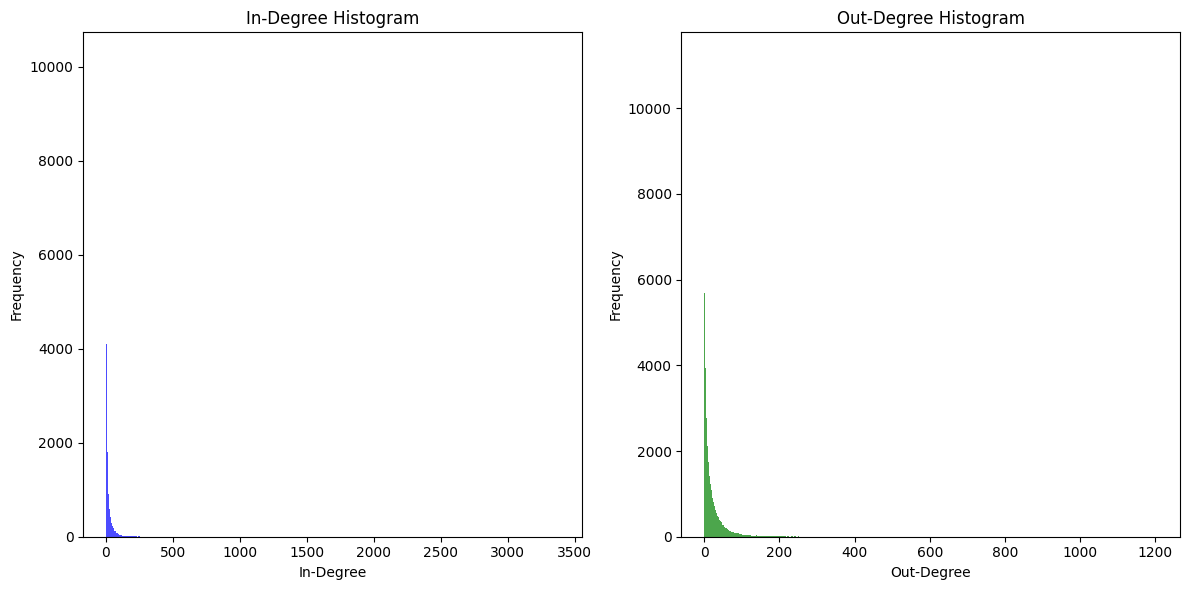

In [ ]:
import matplotlib.pyplot as plt

# Plotting the in-degree histogram
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.hist(in_degree_sequence, bins=max(in_degree_sequence)-min(in_degree_sequence), color='blue', alpha=0.7)
plt.title('In-Degree Histogram')
plt.xlabel('In-Degree')
plt.ylabel('Frequency')

# Plotting the out-degree histogram
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.hist(out_degree_sequence, bins=max(out_degree_sequence)-min(out_degree_sequence), color='green', alpha=0.7)
plt.title('Out-Degree Histogram')
plt.xlabel('Out-Degree')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

An intriguing observation emerges: a majority of nodes exhibit relatively low in- and out-degrees, yet the distribution exhibits a pronounced skew towards higher degrees. This phenomenon mirrors the wealth distribution seen in capitalist societies. Given the expansive range of degree values, a more revealing approach involves plotting a scatter plot of Degrees versus Frequencies on a log-log scale. This method allows us to discern patterns that are otherwise obscured in traditional linear scales.

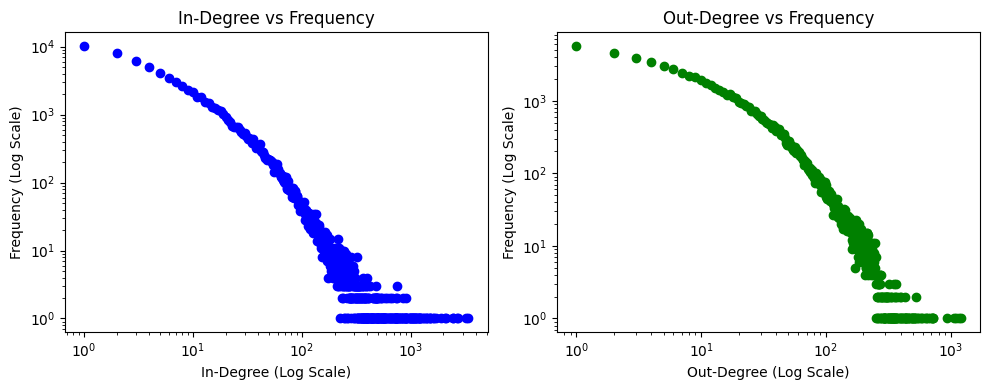

In [ ]:
import numpy as np
from collections import Counter

# Function to calculate degree frequencies
def calculate_frequencies(degree_sequence):
    # Count the frequency of each degree
    degree_counts = Counter(degree_sequence)
    # Filter out zero degrees
    filtered_degrees = {deg: count for deg, count in degree_counts.items() if deg > 0}
    degrees = np.array(list(filtered_degrees.keys()))
    frequencies = np.array(list(filtered_degrees.values()))
    return degrees, frequencies

# Calculate frequencies for in-degrees and out-degrees
in_degrees, in_frequencies = calculate_frequencies(in_degree_sequence)
out_degrees, out_frequencies = calculate_frequencies(out_degree_sequence)

# Plotting
plt.figure(figsize=(10, 4))

# Scatter plot for in-degrees
plt.subplot(1, 2, 1)
plt.scatter(in_degrees, in_frequencies, color='blue')
plt.xscale('log')
plt.yscale('log')
plt.title('In-Degree vs Frequency')
plt.xlabel('In-Degree (Log Scale)')
plt.ylabel('Frequency (Log Scale)')

# Scatter plot for out-degrees
plt.subplot(1, 2, 2)
plt.scatter(out_degrees, out_frequencies, color='green')
plt.xscale('log')
plt.yscale('log')
plt.title('Out-Degree vs Frequency')
plt.xlabel('Out-Degree (Log Scale)')
plt.ylabel('Frequency (Log Scale)')

plt.tight_layout()
plt.show()

A common characteristic of most online social networks, including Twitter, is their heavily skewed, or heavy-tailed, degree distribution. This manifests as a small number of individuals possessing a disproportionately large number of connections, while the vast majority have few. Theoretical explanations for this phenomenon often cite a 'Rich-Gets-Richer' dynamic, where already popular individuals are more likely to attract new links than their less-connected counterparts.

Homework Assignment: Extend this analysis to the undirected Facebook network, accessible from the SNAP database of social graphs at Stanford. Investigate whether similar patterns of degree distribution emerge in this different social context.


A fascinating aspect of Twitter's network structure is the dichotomy between in-degrees and out-degrees. In-degrees in this context represent the number of followers a user has – a metric largely beyond an individual's direct control. Conversely, out-degrees correspond to the number of accounts a user chooses to follow – a decision under each individual's purview. To gain insights into the interplay between these two variables, we will employ a scatter plot. This analysis promises to uncover the nuanced relationship between an individual's social influence and their personal choices on the platform.

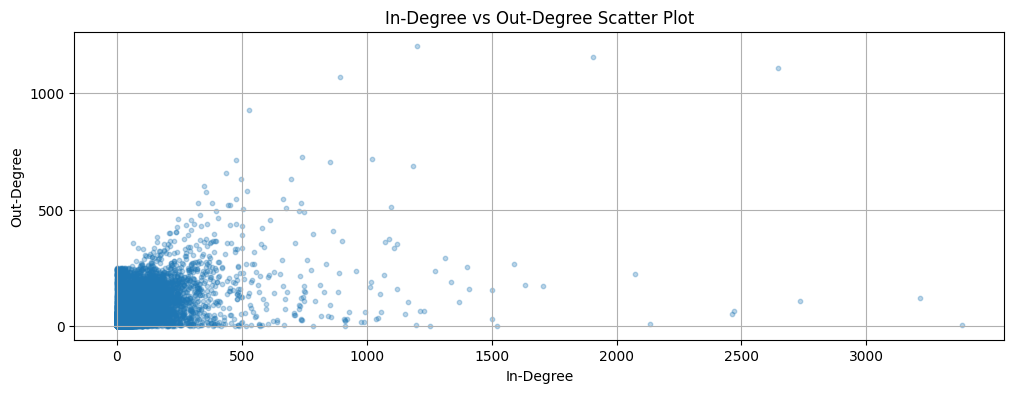

In [ ]:
# Generate scatter plot
plt.figure(figsize=(12, 4))
plt.scatter(in_degree_sequence, out_degree_sequence, s=10, alpha=0.3) # Adjust 's' for point size and 'alpha' for transparency
plt.xlabel('In-Degree')
plt.ylabel('Out-Degree')
plt.title('In-Degree vs Out-Degree Scatter Plot')
# Determine the range for the ticks
max_in_degree = max(in_degree_sequence)
max_out_degree = max(out_degree_sequence)
# Set ticks with 500 unit separation
plt.xticks(np.arange(0, max_in_degree + 1, 500))
plt.yticks(np.arange(0, max_out_degree + 1, 500))
# Enable grid
plt.grid(True)
plt.show()